In [1]:
%load_ext autoreload
%aimport venomseq

In [2]:
%pylab inline

from importlib import reload

import venomseq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from collections import Counter
import itertools

sns.set(color_codes=True)

Populating the interactive namespace from numpy and matplotlib


In [10]:
plt.rc('text',usetex=True)

### Load an existing VenomSeq analysis

In [3]:
if os.name == 'nt':
  print("Running Windows example.")
  v = venomseq.VenomSeq(
    samples_file="test",
    gctx_file = "C:\\Users\\jdr2160\\venomseq_data\\annotated_GSE92742_Broad_LINCS_Level5_COMPZ_n473647x12328.gctx"
  )
  v.load(
    wcs_file = "C:\\Users\\jdr2160\\venomseq_data\\wcs.npy",
    tau_file = "C:\\Users\\jdr2160\\venomseq_data\\tau.npy"
  )
else:
  print("Running UNIX example.")
  v = venomseq.VenomSeq(
    samples_file = "test",
    gctx_file= "/Users/jdr2160/data/cmap/annotated_GSE92742_Broad_LINCS_Level5_COMPZ_n473647x12328.gctx",
    signatures_dir = "./signatures_test/"
  )
  v.load(
    wcs_file = "/Users/jdr2160/data/venomseq/FINAL/wcs.npy",
    tau_file = "/Users/jdr2160/data/venomseq/FINAL/tau.npy"
  )

Running Windows example.
Loading reference dataset; this may take a while...
  Parsing GCTX file.
  Loading row metadata.
  Loading column metadata.
...done.
Loading gene symbol data.
Parsing perturbagen class (PCL) data.
Data structures initialized - VenomSeq is now ready for use!


### Heatmap of PCL data

In [4]:
(X, annot) = v.pcl_signatures_with_annotations(type='tau', top_n_metric='var', top_n=400)

In [5]:
tmp = v.pcls_from_annotations(annot)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 2970.91it/s]


In [6]:
Counter(list(itertools.chain.from_iterable(tmp))).most_common()

[('CP_HDAC_INHIBITOR', 41),
 ('CP_AURORA_KINASE_INHIBITOR', 27),
 ('CP_GLUCOCORTICOID_RECEPTOR_AGONIST', 25),
 ('CP_DOPAMINE_RECEPTOR_ANTAGONIST', 24),
 ('CP_ESTROGEN_RECEPTOR_AGONIST', 19),
 ('CP_HSP_INHIBITOR', 17),
 ('CP_PPAR_RECEPTOR_AGONIST', 14),
 ('CP_NUCLEOPHOSMIN_INHIBITOR', 13),
 ('CP_ESTROGEN_RECEPTOR_ANTAGONIST', 11),
 ('CP_EGFR_INHIBITOR', 9),
 ('CP_TUBULIN_INHIBITOR', 9),
 ('CP_NOREPINEPHRINE_REPUTAKE_INHIBITOR', 9),
 ('CP_RAF_INHIBITOR', 8),
 ('CP_PI3K_INHIBITOR', 7),
 ('CP_ADENOSINE_RECEPTOR_AGONIST', 6),
 ('CP_VEGFR_INHIBITOR', 6),
 ('CP_SODIUM_CHANNEL_BLOCKER', 5),
 ('CP_PROGESTERONE_RECEPTOR_AGONIST', 5),
 ('CP_PDGFR_KIT_INHIBITOR', 5),
 ('CP_SEROTONIN_RECEPTOR_ANTAGONIST', 5),
 ('CP_PARP_INHIBITOR', 5),
 ('CP_BCL_INHIBITOR', 4),
 ('CP_FLT3_INHIBITOR', 4),
 ('CP_NA_K_CL_TRANSPORTER_INHIBITOR', 4),
 ('CP_CDK_INHIBITOR', 4),
 ('CP_RETINOID_RECEPTOR_AGONIST', 4),
 ('CP_HMGCR_INHIBITOR', 4),
 ('CP_MTOR_INHIBITOR', 4),
 ('CP_ANDROGEN_RECEPTOR_MODULATOR', 4),
 ('CP_SRC_INH

In [7]:
row_labels = pd.Series([x[0] for x in tmp])
col_labels = pd.Series([
    "snake","snake","snake","snake","snake","snake",
    "spider","spider","spider","spider",
    "fish","fish",
    "scorpion","scorpion","scorpion",
    "amphibian","amphibian","amphibian",
    "arthropod","arthropod","arthropod",
    "mollusc","mollusc","mollusc",
    "fish"
])
lut = {
    "CP_HDAC_INHIBITOR": "r",
    "CP_AURORA_KINASE_INHIBITOR": "b",
    "CP_GLUCOCORTICOID_RECEPTOR_AGONIST": "g",
    "CP_DOPAMINE_RECEPTOR_ANTAGONIST": "darkorange",
    "CP_ESTROGEN_RECEPTOR_AGONIST": "violet"
}
lut2 = {
    "snake": "seagreen",
    "spider": "navy",
    "fish": "crimson",
    "scorpion": "goldenrod",
    "amphibian": "dimgray",
    "arthropod": "steelblue",
    "mollusc": "yellow"
}
colors_r = row_labels.map(lut)
colors_r = colors_r.fillna("w")
colors_c = col_labels.map(lut2)

Text(115.756,0.5,'Tau (connectivity score)')

C:\Users\jdr2160\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\jdr2160\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\jdr2160\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\jdr2160\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\jdr2160\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] n

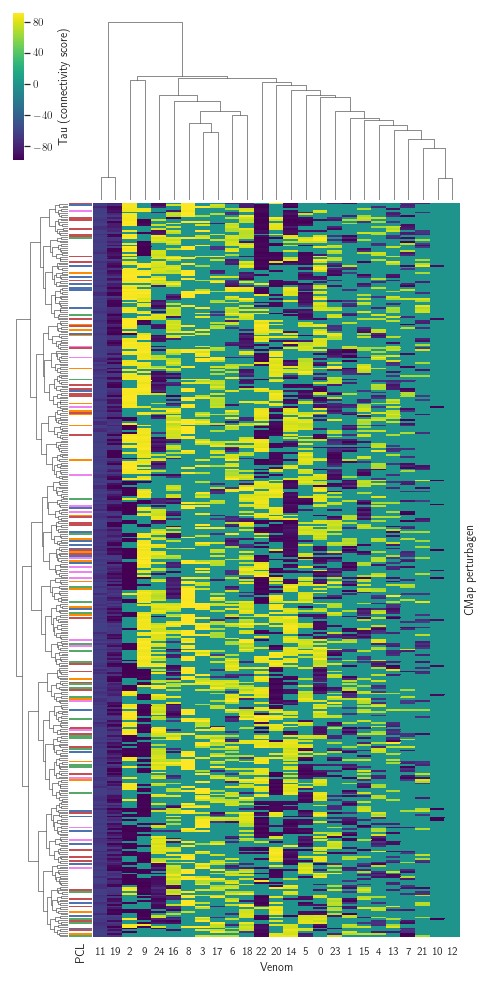

In [11]:
g = sns.clustermap(X, cmap="viridis", robust=True,
                   method='ward', row_colors=list(colors_r), figsize=(8,17))
g.ax_heatmap.get_yaxis().set_ticks([])
g.ax_heatmap.set_xlabel("Venom", **hfont)
g.ax_heatmap.set_ylabel("CMap perturbagen", **hfont)

# Label PCL column
g.ax_row_colors.set_xlabel("PCL", rotation="vertical", **hfont)

# Label legend
g.cax.set_ylabel("Tau (connectivity score)", **hfont)